<div style="font-family: Arial, Helvetica, sans-serif;">
    <div style="display: flex;padding-top: 20px">
        <div><strong>Môn học:</strong> Trực quan hóa dữ liệu</div>
    </div>
    <div style="display: flex;padding-top: 20px">
        <div style="padding-right: 10px;"><strong>Lớp:</strong> 22KHDL</div>
        <div></div>
    </div>
    <div>
        <div style="display: flex;padding-top: 20px">
            <div style="padding-right: 10px;"><strong>Thành viên:</strong></div>
            <div></div>
        </div>
        <table style="font-size: 15px; display:flex;padding-top: 20px">
            <tr>
                <th>No.</th>
                <th>Student ID</th>
                <th>Name</th>
            </tr>
            <tr>
                <td>1</td>
                <td>22127008</td>
                <td style="text-align:left;">Đặng Châu Anh</td>
            </tr>
            <tr>
                <td>2</td>
                <td>22127014</td>
                <td style="text-align:left;">Nguyễn Kim Anh</td>
            </tr>
            <tr>
                <td>4</td>
                <td>22127170</td>
                <td style="text-align:left;">Trần Dịu Huyền</td>
            </tr>
        </table>
    </div>
    <div style="font-size: 25px ;font-weight: 800; text-align: center;padding-top: 20px;">LAB 01</div>
    <div style="font-size: 20px ;font-weight: 800; text-align: center;padding-top: 20px;">THU THẬP DỮ LIỆU VÀ TRỰC QUAN HÓA DỮ LIỆU</div>
</div>

# **Mục lục**

- [**Giới thiệu**](#intro)
    - [Mục tiêu đồ án](#objectives)
    - [Thông tin dữ liệu](#data)
- [**Thư viện sử dụng**](#packages)
- [**Thu thập dữ liệu**](#collect)


<a id="intro"></a>
# **I. Giới thiệu**
<a id="objectives"></a>
## **1. Mục tiêu đồ án:**

<a id="data"></a>
## **2. Thông tin dữ liệu:**


<a id="packages"></a>
# **II. Thư viện sử dụng**

In [21]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests
import re
import matplotlib.pyplot as plt
import seaborn as sns

<a id="collect"></a>
# **III. Thu thập dữ liệu**

Với việc thu thập được dữ liệu về các bài hát trên ứng dụng nghe nhạc trực tuyến NhacCuaTui, sau khi nhóm đã khảo sát và tìm hiểu về NhacCuaTui, nhóm đã có mục tiêu ban đầu cho việc thu thập dữ liệu là sẽ lấy tất cả các thông tin về bài hát mà có thể lấy được từ trang web NhacCuaTui, bao gồm:
- URL
- Tên bài hát
- Tên ca sĩ
- Thể loại
- Xuât xứ
- Nhạc sĩ
- Lời bài hát
- Thời lượng
- Chất lượng âm thanh

Với mục tiêu này, việc thu thập dữ liệu sẽ được thực hiện với sự hỗ trợ của thư viện `BeautifulSoup` và `requests` trong Python vì đây là một trang web tĩnh, không yêu cầu đăng nhập. Biến `BASE_URL` sẽ được sử dụng để lưu trữ URL của route đầu tiên của NhacCuaTui cần sử dụng để thu thập dữ liệu. Tại route này chúng ta sẽ thu thập các thể loại nhạc có trên trang web, cũng như đường dẫn của mỗi thể loại và xuất xứ của các bài hát, để từ đó có thể lấy được các bài hát của mỗi thể loại khác nhau. Ở đây, chúng ta sẽ không lấy thể loại `Tui hát` vì thể loại này không phải là thể loại chính thức mà là thể loại mà người dùng tự tạo. Hàm `get_music_types` sẽ được sử dụng để làm điều này, hàm trả về một danh sách các thể loại nhạc có trên trang web, url và xuất xứ của thể loại đó.

In [102]:
BASE_URL = "https://www.nhaccuatui.com/bai-hat/bai-hat-moi.html"

def get_music_types():
    response = requests.get(BASE_URL)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    music_types = []
    menu_browsing = soup.find_all('ul', class_='detail_menu_browsing_dashboard')
    
    for menu in menu_browsing:
        categories = menu.find_all('li', class_='cate')
        for category in categories:
            origin = category.find('a').text.strip()
            subcategories = category.find_next_siblings('li')
            for subcategory in subcategories:
                if subcategory.get('class') and 'line' in subcategory.get('class'):
                    break
                music_type = subcategory.find('a')
                if music_type:
                    title = music_type.text.strip()
                    url = music_type.get('href')
                    music_types.append((title, url, origin))
    
    return music_types

Các thể loại nhạc, đường dẫn và xuất xứ tại trang web NhacCuaTui được lưu trữ trong biến `music_types` nhận giá trị trả về từ hàm `get_music_types()`.

In [106]:
music_types = get_music_types()
pd.DataFrame(music_types, columns=['genre', 'url', 'origin'])

,genre,url,origin
0,Nhạc Trẻ,https://www.nhaccuatui.com/bai-hat/nhac-tre-mo...,VIỆT NAM
1,Trữ Tình,https://www.nhaccuatui.com/bai-hat/tru-tinh-mo...,VIỆT NAM
2,Remix Việt,https://www.nhaccuatui.com/bai-hat/remix-viet-...,VIỆT NAM
3,Rap Việt,https://www.nhaccuatui.com/bai-hat/rap-viet-mo...,VIỆT NAM
4,Tiền Chiến,https://www.nhaccuatui.com/bai-hat/tien-chien-...,VIỆT NAM
5,Nhạc Trịnh,https://www.nhaccuatui.com/bai-hat/nhac-trinh-...,VIỆT NAM
6,Rock Việt,https://www.nhaccuatui.com/bai-hat/rock-viet-m...,VIỆT NAM
7,Cách Mạng,https://www.nhaccuatui.com/bai-hat/cach-mang-m...,VIỆT NAM
8,Pop,https://www.nhaccuatui.com/bai-hat/pop-moi.html,ÂU MỸ
9,Rock,https://www.nhaccuatui.com/bai-hat/rock-moi.html,ÂU MỸ


Theo kiểm tra từ trước thì với mỗi thể loại khác nhau, trang NhacCuaTui sẽ có 25 trang chứa các bài hát của thể loại đó. Nên để thu thập dữ liệu, chúng ta sẽ cần lặp qua từng trang của mỗi thể loại nhạc để lấy được url của các bài hát thuộc thể loại đó biết rằng url của mỗi trang thuộc mỗi thể loại có cấu trúc `https://www.nhaccuatui.com/bai-hat/{thể loại}.{page}.html` với `page` là thứ tự trang. Hàm `get_song_links` sẽ được sử dụng để xử lí điều này, hàm trả về một danh sách các url của các bài hát thuộc thể loại nhạc đang xét.

In [115]:
def get_song_links(music_type_url, pages=25):
    song_links = []
    for page in range(1, pages + 1):
        url = f"{music_type_url[:-5]}.{page}.html"
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        
        for a in soup.select('.list_music_full .info_song a.name_song'):
            song_links.append(a.get('href'))
    
    return song_links

Tiếp theo, ta sẽ lấy thông tin của mỗi bài hát từ url của bài hát đó. Cụ thể, ta sẽ lấy thông tin về tên bài hát, tên ca sĩ, thể loại, xuất xứ, nhạc sĩ, lời bài hát, thời lượng và chất lượng âm thanh của bài hát. Trong hàm `scrape_song_data`, ta sẽ sử dụng thư viện `BeautifulSoup` để phân tích pháp HTML của trang web và lấy thông tin cần thiết từ trang web. Hàm trả về thông tin của từng bài hát.

In [187]:
def scrape_song_data(song_url):
    response = requests.get(song_url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    name = soup.select_one('.detail_info_playing_now b').text
    artist = soup.select_one('.detail_info_playing_now .name_singer').text if soup.select_one('.detail_info_playing_now .name_singer') else 'N/A'

    composer_element = soup.find('p', string=lambda x: x and 'Nhạc sĩ:' in x)
    composer = composer_element.text.split(': ')[1] if composer_element else 'N/A'
    
    lyrics = soup.select_one('#divLyric').text.strip() if soup.select_one('#divLyric') else 'N/A'
    
    duration = soup.select_one('meta[itemprop="duration"]').get('content')

    return {
        'url': song_url,
        'name': name,
        'artist': artist,
        'composer': composer,
        'lyrics': lyrics,
        'duration': duration,
    }

Bây giờ, chúng ta sẽ thực hiện thu thập dữ liệu từ trang web NhacCuaTui bằng cách sử dụng các hàm đã được xây dựng với các logic đã đề cập ở trên. Song, để tránh việc bị ngắt kết nối với trang web hay bị chặn IP, chúng ta sẽ sử dụng try-except để xử lí các trường hợp này, tránh phải thu thập lại từ đầu. Đồng thời trong lúc lặp qua các thể loại nhạc, chúng ta sẽ thêm các trường `genre`, `origin` vào dữ liệu để biết được bài hát thuộc thể loại và xuất xứ nào. Tất cả thông tin về bài hát sẽ được lưu vào biến `all_songs`.

In [ ]:
all_songs = []

for title, url, origin in music_types:
    try:
        song_links = get_song_links(url)
        for song_link in song_links:
            song_data = scrape_song_data(song_link)
            song_data['genre'] = title
            song_data['origin'] = origin
            all_songs.append(song_data)
            print(len(all_songs))
    except Exception as e:
        print(f"Error: {e}")

Vậy là chúng ta đã thu thập xong được dữ liệu từ trang web NhacCuaTui, trước khi chuyển đến phần tiếp theo - Khám phá dữ liệu, chúng ta sẽ chuyển `all_songs` thành DataFrame và lưu dữ liệu vào file `song_data.csv` để sử dụng sau này, tranh việc phải thu thập lại từ đầu.

In [200]:
raw_df = pd.DataFrame(all_songs)
raw_df.sample(5)

,url,name,artist,composer,lyrics,duration,genre,origin
12968,https://www.nhaccuatui.com/bai-hat/valori-aggi...,Valori aggiunti,Tutti Fenomeni,N/A,- Hiện chưa có lời bài hát nào cho Valori aggi...,PT2M54S,Indie,ÂU MỸ
9342,https://www.nhaccuatui.com/bai-hat/private-isl...,Private Island,Gunna,N/A,"I'm just kickin' it with a baddie, smokin' on ...",PT2M12S,R&B/Hip Hop/Rap,ÂU MỸ
3896,https://www.nhaccuatui.com/bai-hat/mot-trai-ti...,Một Trái Tim Một Quê Hương,Trần Hồng Kiệt,N/A,Bài hát: Một Trái Tim Một Quê Hương - Trần Hồn...,PT5M6S,Tiền Chiến,VIỆT NAM
3493,https://www.nhaccuatui.com/bai-hat/con-thuyen-...,Con Thuyền Không Bến,Ái Xuân (NSƯT),N/A,Bài hát: Con Thuyền Không Bến - Ái Xuân\n\nĐêm...,PT6M15S,Tiền Chiến,VIỆT NAM
14785,https://www.nhaccuatui.com/bai-hat/twenty-five...,"Twenty-five, Twenty-one",Jaurim,N/A,- Hiện chưa có lời bài hát nào cho Twenty-five...,PT4M47S,Nhạc Hàn,CHÂU Á


Với bộ dữ liệu này và vì mục đích của nhóm là trực quan hóa và phân tích về xu hướng âm nhạc nên nhóm sẽ thu thập dữ liệu bảng xếp hạng bài hát vì không thể thu thập được số lượt nghe của bài.

In [86]:
url = 'https://v11.nhaccuatui.com/bai-hat/top-20.1-5-d55-2025.html'

response = requests.get(url)
response.raise_for_status()

soup = BeautifulSoup(response.content, 'html.parser')

# Tìm list của bài hát
list_songs = soup.find_all('div', class_='list_chart_page')[0].find('div', class_='box_resource_slide')
songs = list_songs.find_all('ul', class_='list_show_chart')[0].find_all('li')

# Lấy từng bài một
song_chart = []
for song in songs:
    rank = song.find('span', class_='chart_tw').text.strip()
    name = song.find('a', class_='name_song').text.strip()
    artist = song.find('h4', class_='list_name_singer').text.strip()
    song_url = song.find('a', class_='name_song')['href']
    
    song_chart.append({
        'rank': rank,
        'name': name,
        'artist': artist,
        'url': song_url
    })
    
# Chuyển dữ liệu về dataframe
chart_50_df = pd.DataFrame(song_chart)
chart_50_df.sample(5)

,rank,name,artist,url
21,22,ANH TRAI HIP HOP,"RAP VIỆT, B Ray, Hustlang Robber, Gill",https://v11.nhaccuatui.com/bai-hat/anh-trai-hi...
33,34,APT.,"ROSÉ, Bruno Mars",https://v11.nhaccuatui.com/bai-hat/apt-rose-br...
39,40,TÌNH ĐẦU QUÁ CHÉN,"ANH TRAI ""SAY HI"", Quang Hùng MasterD, Negav, ...",https://v11.nhaccuatui.com/bai-hat/tinh-dau-qu...
5,6,Mất Kết Nối,Dương Domic,https://v11.nhaccuatui.com/bai-hat/mat-ket-noi...
17,18,Thương Thì Thôi (Ciray Remix),Jank,https://v11.nhaccuatui.com/bai-hat/thuong-thi-...


Để tái sử dụng dữ liệu, chúng ta sẽ xuất `raw_df` và `chart_50` vào file csv

In [ ]:
raw_df.to_csv('../data/raw_data.csv', index=False, encoding='utf-8', errors='surrogatepass')
chart_50_df.to_csv('../data/top_50_chart_vn.csv', index=False)

<a id="eda"></a>
# **IV. Khám phá dữ liệu**

Trước khi đến phần khám phá dữ liệu, chúng ta sẽ đọc dữ liệu từ file `raw_data.csv` đã lưu ở phần trước và bắt đầu khám phá.

In [100]:
raw_df = pd.read_csv('../data/raw_data.csv', encoding='utf-8')
raw_df.sample(5)

,url,name,artist,composer,lyrics,duration,genre,origin
5976,https://www.nhaccuatui.com/bai-hat/bi-mat-cua-...,Bí Mật Của Người Ra Đi (Acoustic Vocalist Hải ...,Hạc San,NaN,Bi ht: B Mt Ca Ngi Ra i (Acoustic Vocalist Hi ...,PT5M33S,Rock Việt,VIỆT NAM
19249,https://www.nhaccuatui.com/bai-hat/wheres-the-...,Where's The Remote? / Pizza Chaos,Michael McCuistion,NaN,- Hiện chưa có lời bài hát nào cho Where's The...,PT1M10S,Không Lời,KHÁC
12348,https://www.nhaccuatui.com/bai-hat/mamacita-bl...,Mamacita,Black Eyed Peas,NaN,"Bài hát: MAMACITA - The Black Eyed Peas, Ozuna...",PT4M11S,Latin,ÂU MỸ
8850,https://www.nhaccuatui.com/bai-hat/sam-booker-...,Sam Booker (Extended Groove Master Mix),Tarracco,NaN,- Hiện chưa có lời bài hát nào cho Sam Booker ...,PT7M5S,Electronica/Dance,ÂU MỸ
15572,https://www.nhaccuatui.com/bai-hat/bay-phan-ng...,Bảy Phần Ngọt / 七分甜,BY2,NaN,- Hiện chưa có lời bài hát nào cho Bảy Phần Ng...,PT3M14S,Nhạc Hoa,CHÂU Á


<a id="eda1"></a>
## **1. Tổng quan về dữ liệu**

Ở phần này thì chúng ta sẽ khám phá về cấu trúc của dữ liệu. Đầu tiên, chúng ta sẽ kiểm tra số dòng và số cột của dữ liệu để chắc rằng dữ liệu phù hợp với yêu cầu về cấu trúc của bài (hơn 3000 dòng trước tiền xử lí).

**Kích thước dữ liệu:**

In [101]:
print(f"Number of rows: {raw_df.shape[0]}")
print(f"Number of columns: {raw_df.shape[1]}")

Number of rows: 20226
Number of columns: 8


Tiếp theo, chúng ta sẽ kiểm tra xem kiểu dữ liệu của các cột trong dữ liệu để biết được cần phải xử lí kiểu dữ liệu của các cột nào trong dữ liệu ở phần tiền xử lí.

**Kiểu dữ liệu của các cột:**

In [102]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20226 entries, 0 to 20225
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   url       20226 non-null  object
 1   name      20226 non-null  object
 2   artist    20220 non-null  object
 3   composer  3286 non-null   object
 4   lyrics    19888 non-null  object
 5   duration  20226 non-null  object
 6   genre     20226 non-null  object
 7   origin    20226 non-null  object
dtypes: object(8)
memory usage: 1.2+ MB


**Thông tin về các cột trong dữ liệu**

Chúng ta có 8 cột trong dữ liệu, với tất cả các cột đều có kiểu dữ liệu là kiểu dữ liệu phân loại (object).
Ý nghĩa của các cột trong dữ liệu như sau:
- `url`: Đường dẫn của bài hát.
- `name`: Tên của bài hát.
- `artist`: Tên của ca sĩ.
- `composer`: Tên của nhạc sĩ.
- `lyrics`: Lời bài hát.
- `duration`: Thời lượng của bài hát.
- `genre`: Thể loại của bài hát.
- `origin`: Xuất xứ của bài hát.

Vậy cũng có nghĩa là, mỗi hàng trong dữ liệu sẽ chứa thông tin về một bài hát.

**Kiểm tra dữ liệu bị thiếu**

Ở phần này, chúng ta sẽ kiểm tra xem dữ liệu có bị thiếu không, nếu có thì chúng ta sẽ xử lí dữ liệu bị thiếu ở phần tiền xử lí để làm sạch dữ liệu.

In [103]:
print('Giá trị thiếu trong mỗi cột:')
print(raw_df.isnull().sum())

Giá trị thiếu trong mỗi cột:
url             0
name            0
artist          6
composer    16940
lyrics        338
duration        0
genre           0
origin          0
dtype: int64


**Kiểm tra dữ liệu bị trùng**

Ở phần này, chúng ta sẽ kiểm tra xem dữ liệu có bị trùng không, nếu có thì chúng ta sẽ xóa dữ liệu trùng.

In [104]:
print('Dữ liệu trùng lặp:')
print(raw_df.duplicated().sum())

Dữ liệu trùng lặp:
0


Vậy là giai đoạn thu thập dữ liệu làm khá tốt, không có dữ liệu bị trùng. Tiếp theo, chúng ta sẽ tiến hành khám phá xem có bao nhiêu giá trị khác nhau trong mỗi cột. Điều này nhằm giúp chúng ta hiểu rõ hơn về dữ liệu, đặc biệt là về `name`, `artist`, `composer`, `genre` và `origin`. Chúng ta không cần phải khám phá về `url` vì mỗi bài hát sẽ có một url riêng. Tương tự với `lyrics`, còn `duration` có vẻ sẽ cần tiền xử lí để chuyển về dạng số giây để dễ xử lí hơn, nên chúng ta sẽ không khám phá về `duration` ở đây.

In [105]:
for col in ['name', 'artist', 'composer', 'genre', 'origin']:
    print(f"{col}: {raw_df[col].nunique()} giá trị khác nhau")

name: 18394 giá trị khác nhau
artist: 6721 giá trị khác nhau
composer: 1606 giá trị khác nhau
genre: 24 giá trị khác nhau
origin: 4 giá trị khác nhau


<a id="eda2"></a>
## **2. EDA và Tiền xử lí dữ liệu**

Phần này chúng ta sẽ phân tích sâu hơn về tập dữ liệu để khám phá mẫu, phân phối và mối quan hệ giữa các biến.

Đầu tiên, chúng ta sẽ đảm bảo rằng các trường dữ liệu được chuyển sang kiểu dữ liệu hợp lí của nó. Như đã xem xét ở phần trên, toàn bộ các trường dữ liệu đều thuộc kiểu phân loại. Tuy nhiên, liệu tất cả các trường đều thích hợp với kiểu dữ liệu phân loại không? Để trả lời câu hỏi này, chúng ta sẽ xem lại dữ liệu.

In [106]:
raw_df.head(5)

,url,name,artist,composer,lyrics,duration,genre,origin
0,https://www.nhaccuatui.com/bai-hat/re-ndm-wtra...,Rê NDM,Wtran,"Wtran, Cà Nâu\n \n ...",Rê NDM – WTran ft. Cà Nâu\n\nWTran:\nChú bé lo...,PT3M15S,Nhạc Trẻ,VIỆT NAM
1,https://www.nhaccuatui.com/bai-hat/yeu-di-chau...,Yêu Đi,Châu Khải Phong,NaN,- Hiện chưa có lời bài hát nào cho Yêu Đi do c...,PT4M32S,Nhạc Trẻ,VIỆT NAM
2,https://www.nhaccuatui.com/bai-hat/diem-xui-da...,Điềm Xui,Daduc,Daduc\n \n ...,Daduc - Điềm Xui (We Broke Up Yesterday)\n\nth...,PT3M25S,Nhạc Trẻ,VIỆT NAM
3,https://www.nhaccuatui.com/bai-hat/mashup-we-d...,"Mashup We Don't Talk Anymore, Để Em Rời Xa (Bi...",Đức Phúc,NaN,NaN,PT4M58S,Nhạc Trẻ,VIỆT NAM
4,https://www.nhaccuatui.com/bai-hat/giu-em-that...,Giữ Em Thật Lâu,Naod,Naod\n \n ...,Bài hát: Giữ Em Thật Lâu - Naod\n\nCòn điều gì...,PT4M14S,Nhạc Trẻ,VIỆT NAM


Ta thấy rằng trường `duration` chứa thời lượng của bài hát với dạng chung là PT<phút>M<giây>S. Để dễ xử lí hơn, chúng ta sẽ chuyển trường `duration` về dạng int, đơn vị giây.

In [107]:
def duration_to_seconds(duration):
    match = re.match(r'PT(\d+)M(\d+)S', duration)
    if match:
        min = int(match.group(1))
        sec = int(match.group(2))
        return min * 60 + sec
    return 0

raw_df['duration'] = raw_df['duration'].apply(duration_to_seconds)
raw_df.sample(5)
display(raw_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20226 entries, 0 to 20225
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   url       20226 non-null  object
 1   name      20226 non-null  object
 2   artist    20220 non-null  object
 3   composer  3286 non-null   object
 4   lyrics    19888 non-null  object
 5   duration  20226 non-null  int64 
 6   genre     20226 non-null  object
 7   origin    20226 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.2+ MB


None

Như chúng ta đã kiểm tra ở phần trên `composer`, `lyrics` thiếu ra khá nhiều giá trị, `artist` cũng có thiếu nhưng ít hơn. Chúng ta sẽ xử lí dữ liệu bị thiếu ở phần này.

In [108]:
raw_df.isna().sum()

url             0
name            0
artist          6
composer    16940
lyrics        338
duration        0
genre           0
origin          0
dtype: int64

Đối với các trường này, nguyên nhân chính là do trang web cho phép nghệ sĩ hoặc cộng đồng cập nhật `artist`, `composer` và `lyrics` nên không phải lúc nào cũng có 2 trường này. Tuy nhiên dữ liệu bị thiếu không thể chỉ phát hiện bằng hàm `isna()` mà còn phải kiểm tra xem có dòng chữ `- Hiện chưa có lời bài hát nào` vì trường `lyrics` sẽ chứa dòng chữ này nếu không có lời bài hát. Còn đối với `composer` và `artist`, nếu không có tên nhạc sĩ thì trường `composer` và `artist`sẽ có thể có `Various Artists` hoặc `VA` hoặc `N/A`.

In [109]:
def find_missing_lyrics_comp(col):
    missing_lyrics_df = raw_df[raw_df['lyrics'].str.contains('- Hiện chưa có lời bài hát nào', na=False)]
    missing_lyrics_num = missing_lyrics_df.shape[0] + raw_df['lyrics'].isna().sum()
    print(f"Số bài hát thiếu lời: {missing_lyrics_num}")
    print(f"Chiếm tỷ lệ: {missing_lyrics_num / raw_df.shape[0] * 100:.2f}%")

    missing_composer_df = raw_df[raw_df['composer'].isin(['N/A', 'VA', 'Various Artists'])]
    missing_composer_num = missing_composer_df.shape[0] + raw_df['composer'].isna().sum()
    print(f"Số bài hát không có nhạc sĩ: {missing_composer_num}")
    print(f"Chiếm tỷ lệ: {missing_composer_num / raw_df.shape[0] * 100:.2f}%")
    
    missing_artist_df = raw_df[raw_df['artist'].isin(['N/A', 'VA', 'Various Artists'])]
    missing_artist_num = missing_artist_df.shape[0] + raw_df['artist'].isna().sum()
    print(f"Số bài hát không có nhạc sĩ: {missing_artist_num}")
    print(f"Chiếm tỷ lệ: {missing_artist_num / raw_df.shape[0] * 100:.2f}%")
    
find_missing_lyrics_comp(raw_df)

Số bài hát thiếu lời: 13618
Chiếm tỷ lệ: 67.33%
Số bài hát không có nhạc sĩ: 16940
Chiếm tỷ lệ: 83.75%
Số bài hát không có nhạc sĩ: 574
Chiếm tỷ lệ: 2.84%


Số lượng dữ liệu bị thiếu ở `composer` và `lyrics` khá nhiều, tuy thế vì mục đích của nhóm là phân tích xu hướng âm nhạc của thị trường Việt Nam nên nhóm sẽ không xóa sample bị thiếu ở `composer` và `lyrics` mà sẽ giữ nguyên dữ liệu. Tuy nhiên, các giá trị bị thiếu ở `composer` và `lyrics` sẽ được thay thế bằng `Unknown` để thống nhất dữ liệu và dễ xử lí hơn.

In [110]:
raw_df['composer'] = raw_df['composer'].fillna('Unknown')
raw_df['lyrics'] = raw_df['lyrics'].fillna('Unknown')
raw_df.loc[raw_df['lyrics'].str.contains('- Hiện chưa có lời bài hát nào', na=False), 'lyrics'] = 'Unknown'
find_missing_lyrics_comp(raw_df)
print('\nNgoài ra, giá trị thiếu còn lại:')
display(raw_df.isna().sum())

Số bài hát thiếu lời: 0
Chiếm tỷ lệ: 0.00%
Số bài hát không có nhạc sĩ: 0
Chiếm tỷ lệ: 0.00%
Số bài hát không có nhạc sĩ: 574
Chiếm tỷ lệ: 2.84%

Ngoài ra, giá trị thiếu còn lại:


url         0
name        0
artist      6
composer    0
lyrics      0
duration    0
genre       0
origin      0
dtype: int64

Đối với `artist`, chúng ta cũng làm tương tự. Tuy nhiên số lượng dữ liệu bị thiếu ít hơn nên nhóm cũng chuyển các giá trị `Various Artists`, `VA`, `N/A` thành `Unknown` và xóa các sample bị thiếu (isna).

In [111]:
raw_df= raw_df.dropna(subset=['artist'])
raw_df.loc[raw_df['artist'].str.contains('Various Artists', na=False), 'artist'] = 'Unknown'
find_missing_lyrics_comp(raw_df)
raw_df.isna().sum()

Số bài hát thiếu lời: 0
Chiếm tỷ lệ: 0.00%
Số bài hát không có nhạc sĩ: 0
Chiếm tỷ lệ: 0.00%
Số bài hát không có nhạc sĩ: 0
Chiếm tỷ lệ: 0.00%


url         0
name        0
artist      0
composer    0
lyrics      0
duration    0
genre       0
origin      0
dtype: int64

Vậy là chúng ta đã xử lí xong dữ liệu bị thiếu, theo như đã tìm hiểu ở trên thì bộ dữ liệu cũng không có dữ liệu trùng nên chúng ta sẽ tiếp tục khám phá dữ liệu. Đầu tiên chúng ta sẽ xem lại dữ liệu sau khi xử lí.

In [112]:
raw_df.sample(5)

,url,name,artist,composer,lyrics,duration,genre,origin
18692,https://www.nhaccuatui.com/bai-hat/rttfngaren-...,"Råttfångaren Från Hameln, Del 12",Bert Ake Varg,Unknown,Unknown,35,Thiếu Nhi,KHÁC
8890,https://www.nhaccuatui.com/bai-hat/say-what-u-...,Say What U Want,BassJackers,Unknown,Unknown,143,Electronica/Dance,ÂU MỸ
9822,https://www.nhaccuatui.com/bai-hat/show-it-chr...,Show It,Chris Brown,Chris Brown\n \n ...,"Baby, you ain't gotta do too much When I get a...",190,R&B/Hip Hop/Rap,ÂU MỸ
5814,https://www.nhaccuatui.com/bai-hat/dau-do-giua...,Đâu Đó Giữa Những Bất An Và Mưu Cầu Hạnh Phúc,Nam Thế Giới,Unknown,Unknown,395,Rock Việt,VIỆT NAM
7906,https://www.nhaccuatui.com/bai-hat/go-go-power...,Go Go Power Rangers,Haim Saban,Unknown,They've got a power and a force that you've ne...,240,Rock,ÂU MỸ


Có thể thấy ở `lyrics` và `composer`, có những kí tự đặc biệt như `\n`, `\r`, `\t`, `...` nên chúng ta sẽ xử lí dữ liệu ở trường `lyrics` và `composer` để loại bỏ các kí tự đặc biệt này.

In [113]:
raw_df['lyrics'] = raw_df['lyrics'].str.replace(r'[\n\r\t]', ' ', regex=True)
raw_df['lyrics'] = raw_df['lyrics'].str.replace(r'\.\.\.', '', regex=True)

raw_df['composer'] = raw_df['composer'].str.replace(r'[\n\r\t]', ' ', regex=True)
raw_df['composer'] = raw_df['composer'].str.replace(r'\.\.\.', '', regex=True)

raw_df.head(5)

,url,name,artist,composer,lyrics,duration,genre,origin
0,https://www.nhaccuatui.com/bai-hat/re-ndm-wtra...,Rê NDM,Wtran,"Wtran, Cà Nâu ...",Rê NDM – WTran ft. Cà Nâu WTran: Chú bé loắt ...,195,Nhạc Trẻ,VIỆT NAM
1,https://www.nhaccuatui.com/bai-hat/yeu-di-chau...,Yêu Đi,Châu Khải Phong,Unknown,Unknown,272,Nhạc Trẻ,VIỆT NAM
2,https://www.nhaccuatui.com/bai-hat/diem-xui-da...,Điềm Xui,Daduc,Daduc ...,Daduc - Điềm Xui (We Broke Up Yesterday) thôi...,205,Nhạc Trẻ,VIỆT NAM
3,https://www.nhaccuatui.com/bai-hat/mashup-we-d...,"Mashup We Don't Talk Anymore, Để Em Rời Xa (Bi...",Đức Phúc,Unknown,Unknown,298,Nhạc Trẻ,VIỆT NAM
4,https://www.nhaccuatui.com/bai-hat/giu-em-that...,Giữ Em Thật Lâu,Naod,Naod ...,Bài hát: Giữ Em Thật Lâu - Naod Còn điều gì e...,254,Nhạc Trẻ,VIỆT NAM


Có một số kí tự trong `lyrics` và `composer` không phải là kí tự có thể encode `utf-8` (lí do khi lưu file ban đầu đã phải sử dụng `errors='surrogatepass'`) nên chúng ta sẽ xóa các kí tự này.

In [114]:
def remove_non_utf8(text):
    return text.encode('utf-8', 'ignore').decode('utf-8')

raw_df['lyrics'] = raw_df['lyrics'].apply(remove_non_utf8)
raw_df['composer'] = raw_df['composer'].apply(remove_non_utf8)

raw_df.sample(5)

,url,name,artist,composer,lyrics,duration,genre,origin
4794,https://www.nhaccuatui.com/bai-hat/quynh-huong...,Quỳnh Hương,Quang Linh,Unknown,Unknown,252,Nhạc Trịnh,VIỆT NAM
16427,https://www.nhaccuatui.com/bai-hat/go2-jet-coa...,Go!×2 Jet Coaster,Hiro Shimono,Unknown,Unknown,120,Nhạc Nhật,CHÂU Á
9728,https://www.nhaccuatui.com/bai-hat/eyes-blue-l...,Eyes Blue Like The Atlantic,IWL,Unknown,Eyes blue like the Atlantic and I'm going down...,105,R&B/Hip Hop/Rap,ÂU MỸ
13433,https://www.nhaccuatui.com/bai-hat/straight-na...,Straight & Narrow (Remastered),Teenage Fanclub,Norman Blake | Lời,Unknown,131,Indie,ÂU MỸ
14722,https://www.nhaccuatui.com/bai-hat/2022-foreve...,2022 Forever,DKZ,Unknown,Unknown,202,Nhạc Hàn,CHÂU Á


<a id="eda21"></a>
### **Thống kê mô tả**

Tiếp theo, chúng ta sẽ phân tích sâu hơn về tập dữ liệu để khám phá mẫu, phân phối và mối quan hệ giữa các biến.

Đầu tiên, chúng ta sẽ xem xét các thống kê mô tả cho các cột để có các giá trị: trung bình (mean), trung vị (median), giá trị nhỏ nhất (min), giá trị lớn nhất (max), tứ phân vị (quartile) của các cột dạng số. Chúng ta không cần lo lắng về giá trị bị thiếu ở các trường này vì đã xử lí ở phần trên.

In [115]:
raw_df.describe()

,duration
count,20220.000000
mean,233.378487
std,120.078991
min,0.000000
25%,183.000000
50%,223.000000
75%,273.000000
max,3344.000000


<a id="eda22"></a>
### **Phân bố của dữ liệu dạng số**

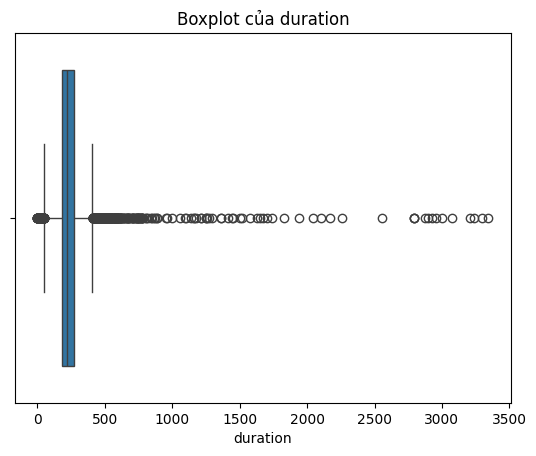

Giá trị ngoại lai của duration:
                                name  duration
221               Nhớ Thương Làm Chi        26
423                     Lk Chào Xuân       461
424                          Lk Xuân      1059
434    Liên Khúc: Chuyện Tình Bolero      1216
436                Vui Tết Miệt Vườn       548
...                              ...       ...
20212                   Day To Night         7
20213                     Kill Klesk         6
20214                     Angry Save         6
20222                        Pop Mix      1271
20224                      Italo Mix      1941

[619 rows x 2 columns]


In [116]:
sns.boxplot(x=raw_df['duration'])
plt.title('Boxplot của duration')
plt.show()

# Calculate IQR for `duration` 
Q1 = raw_df['duration'].quantile(0.25)
Q3 = raw_df['duration'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_duration = raw_df[(raw_df['duration'] < lower_bound) | (raw_df['duration'] > upper_bound)]
if not outliers_duration.empty:
    print("Giá trị ngoại lai của duration:")
    print(outliers_duration[['name', 'duration']])
else:
    print("Không có giá trị ngoại lai nào tìm được")

Chúng ta có thể thấy dữ liệu có một trường dữ liệu dạng số hiện tại là `duration`. Với các giá trị ngoại lai như trên ta có thể thấy được các giá trị ngoại lai này có thể ảnh hưởng đến phân bố. Tuy nhiên là chúng ta sẽ không xử lí các giá trị ngoại lai (loại bỏ nó hay scale lại) này ở đây mà sẽ phân tích kĩ hơn ở phần sau.

<a id="eda23"></a>
### **Phân bố của dữ liệu dạng phân loại**

Chúng ta đã kiểm tra dữ liệu thiếu ở phần trước nên phần này không phải bận tâm về nó nữa (missing_ratio = 0%). Đầu tiên chúng ta sẽ tính các giá trị như sau:
- Số lượng giá trị khác nhau trong mỗi trường, không tính giá trị thiếu: `num_values`
- Tỉ lệ các giá trị khác nhau trong mỗi trường, không tính giá trị thiếu: `value_ratios`

In [117]:
# Tìm các trường thuộc kiểu phân loại
categorical_cols = raw_df.select_dtypes(include=['object']).columns.tolist()

cat_col_info = {}

# Tính toán
for col in categorical_cols:    
    num_values = raw_df[col].nunique(dropna = True)
    
    # Tính số các giá trị và tỉ lệ giá trị
    value_ratio = (np.round(raw_df[col].value_counts(normalize=True, ascending=False) * 100, 1)).to_dict()
    
    cat_col_info[col] = {
        "num_values": num_values,
        "value_ratio": value_ratio
    }
    
cat_col_info_df = pd.DataFrame(cat_col_info)
cat_col_info_df.T

,num_values,value_ratio
url,20220,{'https://www.nhaccuatui.com/bai-hat/re-ndm-wt...
name,18392,"{'Diễm Xưa': 0.2, 'Biển Nhớ': 0.2, 'Còn Tuổi N..."
artist,6720,"{'Unknown': 2.8, 'Jimmie Rodgers': 0.7, 'Marco..."
composer,1607,"{'Unknown': 83.7, 'Trịnh Công Sơn ..."
lyrics,6394,"{'Unknown': 67.3, 'Nụ cười son mắt biếc rạng n..."
genre,24,"{'Blues/Jazz': 4.9, 'Latin': 4.9, 'Country': 4..."
origin,4,"{'VIỆT NAM': 36.6, 'ÂU MỸ': 32.1, 'CHÂU Á': 19..."


Có vẻ như một bất thường trong dữ liệu. Từ dataframe trên, chúng ta có thể có được một số thông tin về bộ dữ liệu như sau:
- Bất thường là có 20226 url khác nhau nhưng chỉ có 18392 tên bài hát.
- Có 6719 nghệ sĩ khác nhau còn lại là các nghệ sĩ không biết tên tính là `Unknown`, chiếm 2.8%, khá nhỏ.
- Có 1606 nhạc sĩ khác nhau. Trong đó đại đa số đều không có thông tin về nhạc sĩ chiếm 83.7%.
- Về lời bài hát `lyrics`, chỉ có 6393 bài hát có lời bài hát, còn lại là không có lời bài hát (chiếm 67.3%).
- Có 24 thể loại khác nhau.
- Có 4 xuất xứ âm nhạc khác nhau, dẫn đầu là Việt Nam trong bộ dữ liệu này.

**Kiểm tra bất thường:**

Ta có thể đoán rằng có lẽ là do có các bài hát trùng tên với nhau dẫn đến việc có số các tên bài khác nhau khác với số các url. Để kiểm tra giả thuyết này, chúng ta sẽ kiểm tra xem có bài hát nào trùng tên với nhau không.

In [123]:
duplicate_names = raw_df[raw_df.duplicated('name', keep=False)]
print("Tổng số các bài hát trùng tên:", len(duplicate_names))

duplicate_num = raw_df.groupby('name').size().reset_index(name='count')
duplicate_num = duplicate_num[duplicate_num['count'] > 1]

print("Bài hát trùng tên và số lần trùng:")
print(duplicate_num)

Tổng số các bài hát trùng tên: 2801
Bài hát trùng tên và số lần trùng:
                                    name  count
34                       'Round Midnight      3
69                             1, 2 Many      2
360                            Afterlife      2
370                            Agehachou      2
394    Ai Rồi Cũng Sẽ Khác (Haozi Remix)      2
...                                  ...    ...
18159      Đời Gọi Em Biết Bao Nhiêu Lần      2
18244                   Đừng Để Nhau Rơi      2
18278                             Ướt Mi      9
18327                  Ở Hai Đầu Nỗi Nhớ      2
18333                              Ở Trọ     10

[973 rows x 2 columns]


Kiểm tra lại số liệu xem có khớp không

In [125]:
print(len(duplicate_names) + 18392 - len(duplicate_num)) #18392 là số bài hát khác nhau

20220


Vậy lí do là do có nhiều bài hát trùng tên. Nên không có gì bất thường ở đây.

Vậy là đã khám phá và tiền xử lí dữ liệu xong. Bộ dữ liệu mới sẽ được lưu vào file csv để sử dụng ở phần tiếp theo.

In [133]:
raw_df.to_csv('../data/cleaned_data.csv', index=False, encoding='utf-8')
raw_df.sample(5)

,url,name,artist,composer,lyrics,duration,genre,origin
11366,https://www.nhaccuatui.com/bai-hat/resurrectus...,"Resurrectus (From the film ""Rio Grande"")",Sons Of The Pioneers,Unknown,Unknown,153,Country,ÂU MỸ
7103,https://www.nhaccuatui.com/bai-hat/luot-song-r...,Lướt Sóng Ra Khơi,Long Nhật,Unknown,Unknown,188,Cách Mạng,VIỆT NAM
7925,https://www.nhaccuatui.com/bai-hat/honey-go-ho...,Honey Go Home,Flora Cash,Unknown,You were late for every social Tried to tell m...,206,Rock,ÂU MỸ
5751,https://www.nhaccuatui.com/bai-hat/cay-dan-sin...,Cây Đàn Sinh Viên,B-Rock,Unknown,Unknown,253,Rock Việt,VIỆT NAM
4755,https://www.nhaccuatui.com/bai-hat/ra-dong-giu...,Ra Đồng Giữa Ngọ,Hồng Nhung,Trịnh Công Sơn ...,Tác giả: Trịnh Công Sơn Thằng bé xinh xinh ch...,270,Nhạc Trịnh,VIỆT NAM


<div id='analysis'></div>

# **V. Phân tích dữ liệu**